In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline

In [2]:
df = pd.read_csv('datasets/geral.csv', index_col = 'Unnamed: 0')
df.head()
df.shape

(221, 21)

## Convertendo colunas classificatórias que possuem strings para numeros inteiros 

In [3]:
# Desempenho satisfatório = 1,
# Desempenho insatisfatório = 0
# insatisfatório para notas < 5
# satisfatório para notas maiores ou iguais a 5

desempenho = {
    1:0,
    2:0,
    3:0,
    4:0,
    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1,
    11:1
}

df['desempenho'] = df['pont'].replace(desempenho)


# Convertendo os anos para numeros inteiros
# 2f = 1, 6f = 2, 7f = 3, 8f = 4, 9f = 5, 1m = 6, 3m = 7

ano_to_int = {
    '7f':3, '6f':2, '1m':6, '3m':7, '9f':5, '8f':4, '2f':1
}

df['anoint'] = df['ano'].replace(ano_to_int)


# Convertendo o numero de irmaos para inteiros sendo '4 ou mais' apenas 4

numirmaos_to_int = {
    '0':0,
    '1':1,
    '2':2,
    '3':3,
    '4 ou mais': 4
}

df['numirmaosint'] = df['numirmaos'].replace(numirmaos_to_int)


# Convertendo valores de 'lerouverfilmeserie' para inteiros
# sendo ler = 1, 'ver series/filmes = 2'

lerouverfilmeserie_to_int = {
    'Ler':1,
    'Ver séries/filmes': 2
}

df['lerouverfilmeserieint'] = df['lerouverfilmeserie'].replace(lerouverfilmeserie_to_int)



# Convertendo nomes de matérias para inteiros
# Sendo história = 1, outra = 2, matemática = 3, artes = 4, química = 5, portugues = 6, geografia = 7, física = 8

materia_to_int = {
    'História':1,
    'Outra': 2,
    'Matemática':3,
    'Artes':4,
    'Química':5,
    'Português':6,
    'Geografia':7,
    'Física':8
}

df['materiaint'] = df['materia'].replace(materia_to_int)


# Convertendo nomes de redes sociais para números inteiros
# Sendo tiktok = 1, instagram = 2, outra = 3, twitter = 4, facebook = 5

redesocial_to_int = {
    'TikTok':1,
    'Instagram':2,
    'Outra':3,
    'Twitter':4,
    'Facebook':5
}

df['redesocialint'] = df['redesocial'].replace(redesocial_to_int)

# Convertendo nome de horascel para inteiros
# Sendo "uma a duas horas" = 1, 'Três a quatro horas' = 2, 'Cinco horas ou mais' = 3

horascel_to_int = {
    'Cinco horas ou mais':3,
    'Três a quatro horas':2,
    'Uma a duas horas':1
}

df['horascelint'] = df['horascel'].replace(horascel_to_int)


# Convertendo os nomes de videosyt para inteiros
# Sendo gameplay = 1, musicas e show = 2, podcasts = 3, react = 4, ciencias = 5, noticias = 6

videoyt_to_int = {
    'Gameplay':1,
    'Musicas e shows':2,
    'Podcasts':3,
    'React':4,
    'Ciências':5,
    'Notícias':6
}

df['videoytint'] = df['videoyt'].replace(videoyt_to_int)

# Convertendo o nomes em 'jogos' para inteiros
# sendo celular = 1, videogame = 2, pc = 3, nao jogo = 4

jogos_to_int = {
    'Celular':1,
    'Videogame':2,
    'PC':3,
    'Não jogo':4
}

df['jogosint'] = df['jogos'].replace(jogos_to_int)

# Convertendo nomes da coluna 'tipo' para inteiros
# sendo v = 1, t = 2, m = 3

tipo_to_int = {
    'v':1,
    't':2,
    'm':3
}

df['tipoint'] = df['tipo'].replace(tipo_to_int)

In [4]:
df.head()

,nome,idade,sfem,smasc,sna,ano,irmaos,numirmaos,lelivros,lehqs,...,desempenho,anoint,numirmaosint,lerouverfilmeserieint,materiaint,redesocialint,horascelint,videoytint,jogosint,tipoint
0,tais raele,15,1,0,0,1m,1,1,1,0,...,1,6,1,1,1,1,2,3,1,1
1,mateus pego,15,0,1,0,1m,1,1,0,0,...,1,6,1,2,3,1,3,4,2,1
2,giovana soares gomes munhoz assis,15,1,0,0,1m,1,4 ou mais,1,0,...,1,6,4,1,1,1,2,4,4,1
3,gabriel de brito pereira,15,0,1,0,1m,1,4 ou mais,1,1,...,0,6,4,1,2,3,2,1,3,1
4,eduardo hayakawa kamada do nascimento,15,0,1,0,1m,1,1,0,0,...,1,6,1,2,5,4,1,1,3,1


In [5]:
# Crio um novo dataset apenas com os alunos com desempenho satisfatório,
# ou seja, que acertaram 5 ou mais questões

df_aprovados = df.where(df['desempenho'] == 1).dropna()


# Filtro novamente apenas por colunas que possuem valores numéricos

df_aprovados = df_aprovados[[ 'tipoint', 'idade', 'sfem', 'smasc', 'sna', 'anoint', 'numirmaosint', 'lelivros', 'lehqs', 'ouvemusicas', 'vefilmeserie', 'lerouverfilmeserieint', 'materiaint', 'redesocialint', 'horascelint', 'videoytint', 'jogosint', 'tmedio']]
df_aprovados = df_aprovados.reset_index().drop('index', axis = 1)
df_aprovados.head()

,tipoint,idade,sfem,smasc,sna,anoint,numirmaosint,lelivros,lehqs,ouvemusicas,vefilmeserie,lerouverfilmeserieint,materiaint,redesocialint,horascelint,videoytint,jogosint,tmedio
0,1.0,15.0,1.0,0.0,0.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,71.718
1,1.0,15.0,0.0,1.0,0.0,6.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0,3.0,4.0,2.0,77.074
2,1.0,15.0,1.0,0.0,0.0,6.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,120.848
3,1.0,15.0,0.0,1.0,0.0,6.0,1.0,0.0,0.0,1.0,1.0,2.0,5.0,4.0,1.0,1.0,3.0,68.676
4,1.0,14.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,1.0,74.012


In [6]:
df_aprovados.sort_values(by = 'tmedio')

,tipoint,idade,sfem,smasc,sna,anoint,numirmaosint,lelivros,lehqs,ouvemusicas,vefilmeserie,lerouverfilmeserieint,materiaint,redesocialint,horascelint,videoytint,jogosint,tmedio
74,2.0,16.0,0.0,1.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,1.0,3.0,1.0,10.092
122,3.0,13.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,16.616
153,3.0,11.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,2.0,18.428
154,3.0,11.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,22.188
26,1.0,11.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0,22.376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,1.0,15.0,1.0,0.0,0.0,6.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,5.0,4.0,120.148
2,1.0,15.0,1.0,0.0,0.0,6.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,120.848
120,3.0,13.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,152.856
135,3.0,13.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,156.044


# Aplicando algoritmos de classificação

## Separando dados de treino e teste

In [7]:
# Valores preditores:

X = df_aprovados[['idade',
                  'sfem',
                  'smasc',
                  'sna',
                  'anoint',
                  'numirmaosint',
                  'lelivros',
                  'lehqs',
                  'ouvemusicas',
                  'vefilmeserie',
                  'lerouverfilmeserieint',
                  'materiaint',
                  'redesocialint',
                  'horascelint',
                  'videoytint',
                  'jogosint',
                  'tmedio']]

# Valor a ser predito:
y = df_aprovados['tipoint']

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(f'Existem {X_train.shape[0]} amostras de treino e {X_test.shape[0]} amostras de teste')

Existem 109 amostras de treino e 48 amostras de teste


### Como todos os dados estão em uma escala semelhante, não foi necessário normalizá-los

## Exportando bibliotecas de avaliação de métricas para os algoritmos que serão aplicados

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


## Aplicando SVC (Support Vector Classification)

Acurácia de :  0.3958333333333333

              precision    recall  f1-score   support

         1.0       0.37      0.56      0.44        18
         2.0       0.47      0.60      0.53        15
         3.0       0.00      0.00      0.00        15

    accuracy                           0.40        48
   macro avg       0.28      0.39      0.32        48
weighted avg       0.29      0.40      0.33        48




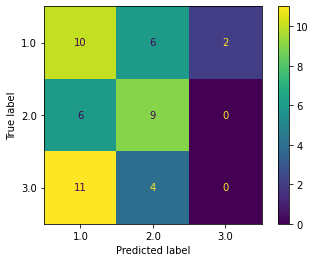

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state = 0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print('Acurácia de : ', accuracy_score(y_test, pred))
print()
print(classification_report(y_test, pred))
print()
cm = confusion_matrix(y_test, pred, labels = svm.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()

plt.show()

In [11]:
# Utilizaremos o Gridsearch para descobrir os melhores parametros e termos mais acurácia no resultado final
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

grid_pred = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.455 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.455 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.409 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.409 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.455 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.455 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.409 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.409 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.455 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.773 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.773 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.773 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.714 total time=   0.0s


Acurácia de :  0.5833333333333334

              precision    recall  f1-score   support

         1.0       0.46      0.67      0.55        18
         2.0       0.80      0.80      0.80        15
         3.0       0.57      0.27      0.36        15

    accuracy                           0.58        48
   macro avg       0.61      0.58      0.57        48
weighted avg       0.60      0.58      0.57        48




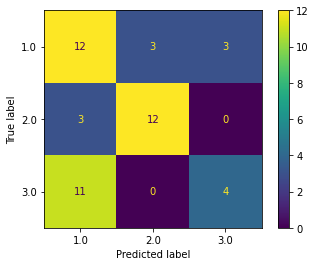

In [12]:
print('Acurácia de : ', accuracy_score(y_test, grid_pred))
print()
print(classification_report(y_test, grid_pred))
print()
cm = confusion_matrix(y_test, grid_pred, labels = grid.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = grid.classes_)
disp.plot()

plt.show()

## Aplicando KNN (K-nearest neighbors)

Acurácia de :  0.4791666666666667

              precision    recall  f1-score   support

         1.0       0.44      0.67      0.53        18
         2.0       0.50      0.53      0.52        15
         3.0       0.60      0.20      0.30        15

    accuracy                           0.48        48
   macro avg       0.51      0.47      0.45        48
weighted avg       0.51      0.48      0.46        48




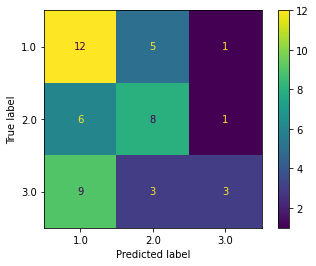

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('Acurácia de : ', accuracy_score(y_test, pred))
print()
print(classification_report(y_test, pred))
print()
cm = confusion_matrix(y_test, pred, labels = knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()

plt.show()

## Aplicando Arvore de Decisão

Acurácia de :  0.7916666666666666

              precision    recall  f1-score   support

         1.0       0.72      0.72      0.72        18
         2.0       0.83      1.00      0.91        15
         3.0       0.83      0.67      0.74        15

    accuracy                           0.79        48
   macro avg       0.80      0.80      0.79        48
weighted avg       0.79      0.79      0.79        48




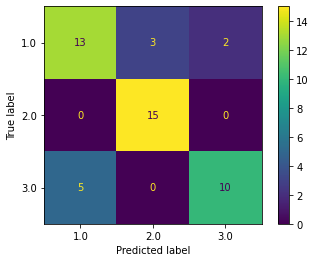

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

pred = dtree.predict(X_test)

print('Acurácia de : ', accuracy_score(y_test, pred))
print()
print(classification_report(y_test, pred))
print()
cm = confusion_matrix(y_test, pred, labels = dtree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree.classes_)
disp.plot()

plt.show()

## Aplicando Random Forest

Acurácia de :  0.8541666666666666

              precision    recall  f1-score   support

         1.0       0.72      1.00      0.84        18
         2.0       1.00      0.93      0.97        15
         3.0       1.00      0.60      0.75        15

    accuracy                           0.85        48
   macro avg       0.91      0.84      0.85        48
weighted avg       0.90      0.85      0.85        48




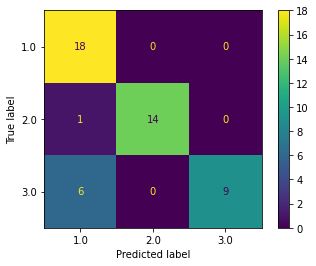

In [15]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)


pred = rfc.predict(X_test)


print('Acurácia de : ', accuracy_score(y_test, pred))
print()
print(classification_report(y_test, pred))
print()
cm = confusion_matrix(y_test, pred, labels = rfc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot()

plt.show()

## Aplicando XGBoost

Acurácia de :  0.8958333333333334
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       1.00      1.00      1.00        15
           2       0.92      0.73      0.81        15

    accuracy                           0.90        48
   macro avg       0.91      0.89      0.90        48
weighted avg       0.90      0.90      0.89        48




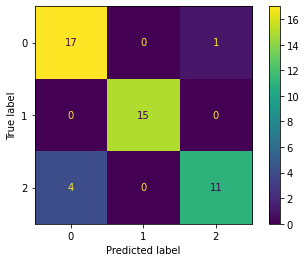

In [16]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


# O XGBoost possui uma particularidade que exige que as classificações comecem em 0
# Portanto, exportei o módulo LabelEncoder do sklearn.preprocessing para fazer este tratamento
# De modo que antes as classes eram 1, 2, 3 (para v, t e m) e agora são 1, 2, 3 respectivamente.

le = LabelEncoder()
y_trainxgb = le.fit_transform(y_train)
y_testxgb = le.fit_transform(y_test)

xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_trainxgb)

pred = xgb.predict(X_test)

print('Acurácia de : ', accuracy_score(y_testxgb, pred))
print(classification_report(y_testxgb, pred))
print()
cm = confusion_matrix(y_testxgb, pred, labels = xgb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb.classes_)
disp.plot()

plt.show()

In [17]:
import pickle

filename = 'modelo_XGBoost.pk1'
pickle.dump(xgb, open(filename, 'wb'))

In [18]:
novo_aluno = pd.Series([11.0,
 0.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 3.0,
 1.0,
 3.0,
 33.291999999999994])

novo_aluno = pd.Series([17.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 3.0, 90.291999999999994])


novo_aluno = df_aprovados.iloc[0][1:]
novo_aluno = pd.DataFrame(novo_aluno).T

colunas = {0:'idade', 1:'sfem', 2:'smasc', 3:'sna', 4:'anoint', 5:'numirmaosint', 6:'lelivros',
       7:'lehqs', 8:'ouvemusicas', 9:'vefilmeserie', 10:'lerouverfilmeserieint',
       11:'materiaint', 12:'redesocialint', 13:'horascelint', 14:'videoytint', 15:'jogosint',
       16:'tmedio'}

novo_aluno = novo_aluno.rename(columns = colunas)

if xgb.predict(novo_aluno)[0] == 0 : print('VIDEO')
elif xgb.predict(novo_aluno)[0] == 1 : print('TEXTO')
else : print('IMAGEM')

VIDEO


In [19]:
import pickle

with open("model.pickle","wb") as f: #cria um documento no seu pc chamado 'model.pickle' em modo de WB (write binary)
  pickle.dump(xgb, f) #dump significa despejar, descarregar
  
# Pronto. Agora você possuí o modelo já treinado salvo no seu pc !

## carregando o modelo para o código
with open("model.pickle","rb") as f: #Carrega o arquivo model.pickle em modo read binary
  modelo_carregado = pickle.load(f)
  
modelo_carregado.predict(novo_aluno)

array([0])

In [35]:
texto = list(df_aprovados.iloc[78][1:])

In [34]:
imagem = list(df_aprovados.iloc[154][1:])

In [32]:
video = list(df_aprovados.iloc[1][1:])

In [33]:
video

[15.0,
 0.0,
 1.0,
 0.0,
 6.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 3.0,
 4.0,
 2.0,
 77.07399999999998]

In [36]:
texto

[16.0,
 1.0,
 0.0,
 0.0,
 7.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 3.0,
 2.0,
 1.0,
 91.73]

In [38]:
imagem

[11.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 3.0,
 1.0,
 3.0,
 22.188]